In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset into python environment

In [2]:
data=pd.read_csv(r"C:\Users\jbnay\Downloads\titanic_dataset.csv") 

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [4]:
data=pd.read_csv(r"C:\Users\jbnay\Downloads\titanic_dataset.csv",index_col='PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [7]:
data.info

<bound method DataFrame.info of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William H

# 4. Fill in all the missing values present in all the columns in the dataset

In [12]:
data.isna().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [9]:
data['Age']= data['Age'].fillna(data['Age'].median()) 

In [10]:
data.dropna(inplace=True) 
print(data.isnull().sum())
print(data.shape)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64
(202, 11)


# 5. Check and handle outliers in at least 3 columns in the dataset


In [13]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

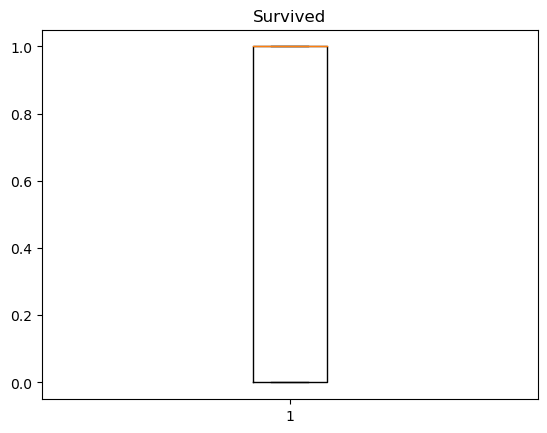

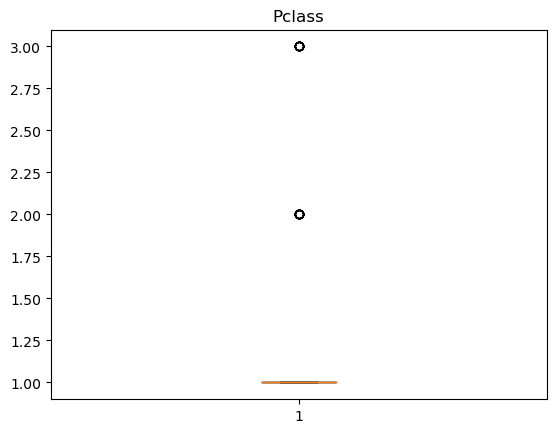

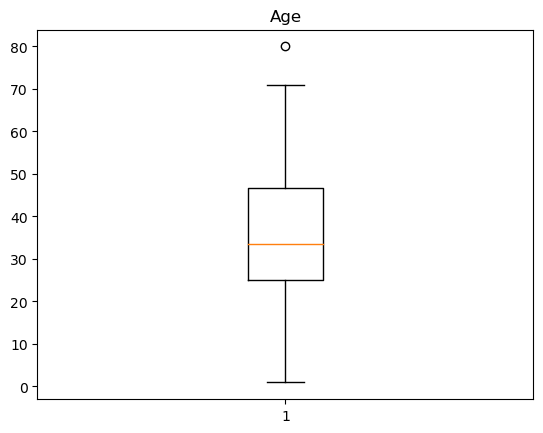

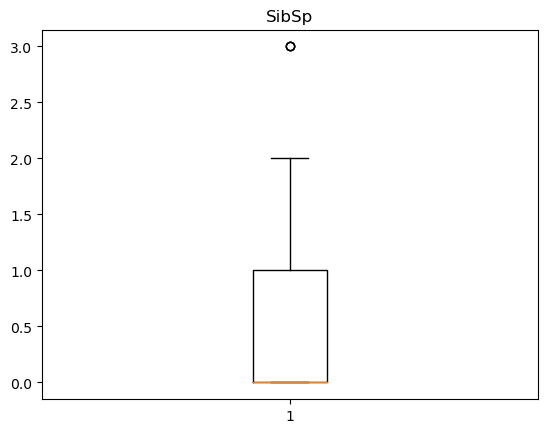

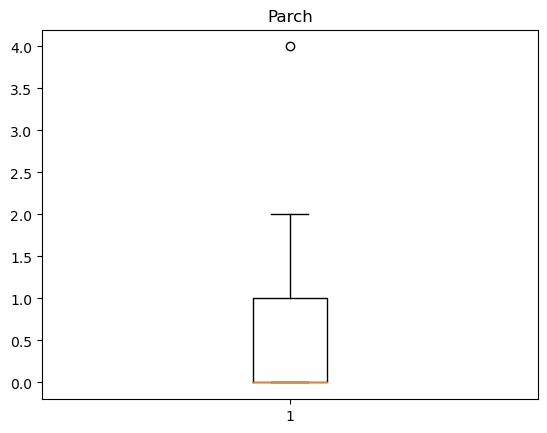

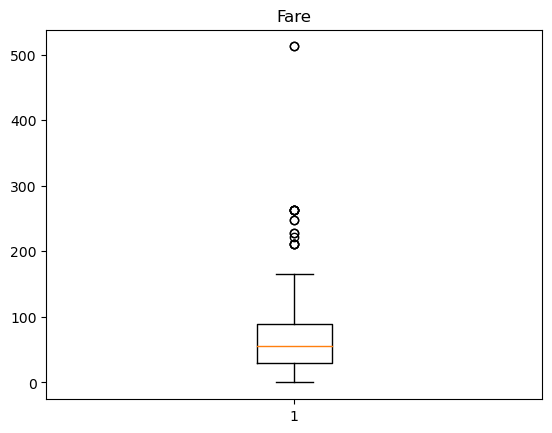

In [14]:
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare'] 
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

#handling outliers in Pclass

In [26]:
Q1 = np.percentile(data['Pclass'],25,interpolation='midpoint')
Q2 = np.percentile(data['Pclass'],50,interpolation='midpoint')
Q3 = np.percentile(data['Pclass'],75,interpolation='midpoint')

C:\Users\jbnay\AppData\Local\Temp\ipykernel_376\1844231181.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Pclass'],25,interpolation='midpoint')
C:\Users\jbnay\AppData\Local\Temp\ipykernel_376\1844231181.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Pclass'],50,interpolation='midpoint')
C:\Users\jbnay\AppData\Local\Temp\ipykernel_376\1844231181.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher'

In [27]:
print(Q1)
print(Q2)
print(Q3)

1.0
1.0
1.0


In [28]:
data['Pclass'].median() 

1.0

In [29]:
IQR=Q3-Q1

In [30]:
print(IQR)

0.0


In [31]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

In [32]:
print(up_lim)
print(low_lim)

1.0
1.0


In [35]:
outliers=[]
for x in data['Pclass']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [34]:
outliers

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [54]:
data.shape

(173, 11)

In [36]:
ind1=data['Pclass']>up_lim
data.loc[ind1].index

Int64Index([ 11,  22,  67,  76, 124, 129, 149, 184, 194, 206, 252, 293, 304,
            328, 341, 346, 395, 430, 474, 517, 619, 700, 716, 718, 752, 773,
            777, 824],
           dtype='int64', name='PassengerId')

In [37]:
data.drop([ 11,  22,  67,  76, 124, 129, 149, 184, 194, 206, 252, 293, 304,
            328, 341, 346, 395, 430, 474, 517, 619, 700, 716, 718, 752, 773,
            777, 824],inplace=True) 

In [38]:
data.shape

(174, 11)

#handling outliers in Age

In [45]:
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

C:\Users\jbnay\AppData\Local\Temp\ipykernel_376\1385708954.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
C:\Users\jbnay\AppData\Local\Temp\ipykernel_376\1385708954.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
C:\Users\jbnay\AppData\Local\Temp\ipykernel_376\1385708954.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or '

In [56]:
print(Q1)
print(Q2)
print(Q3)

35.5
66.6
93.5


In [42]:
data['Age'].median()

36.0

In [43]:
IQR=Q3-Q1

In [44]:
print(IQR)

20.5


In [46]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

In [47]:
print(up_lim)
print(low_lim)

78.75
-3.25


In [68]:
outliers=[]
for x in data['Age']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x) 

In [69]:
outliers

[]

In [50]:
ind1=data['Age']>up_lim
data.loc[ind1].index

Int64Index([631], dtype='int64', name='PassengerId')

In [51]:
data.drop([631],inplace=True)

In [52]:
data.shape

(173, 11)

#handling outliers in 'Fare'

In [58]:
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

C:\Users\jbnay\AppData\Local\Temp\ipykernel_376\159444324.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
C:\Users\jbnay\AppData\Local\Temp\ipykernel_376\159444324.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
C:\Users\jbnay\AppData\Local\Temp\ipykernel_376\159444324.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'm

In [60]:
print(Q1)
print(Q2)
print(Q3)

35.5
66.6
93.5


In [61]:
data['Fare'].median()

66.6

In [62]:
IQR=Q3-Q1

In [63]:
print(IQR)

58.0


In [64]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

In [65]:
print(up_lim)
print(low_lim)

180.5
-51.5


In [66]:
outliers=[]
for x in data['Fare']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x) 

In [67]:
outliers

[263.0,
 263.0,
 247.5208,
 247.5208,
 262.375,
 263.0,
 211.5,
 263.0,
 221.7792,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375]

In [72]:
ind1=data['Fare']>up_lim
data.loc[ind1].index

Int64Index([ 28,  89, 119, 300, 312, 342, 378, 439, 528, 680, 690, 701, 717,
            731, 738, 743, 780],
           dtype='int64', name='PassengerId')

In [73]:
data.drop([ 28,  89, 119, 300, 312, 342, 378, 439, 528, 680, 690, 701, 717,
            731, 738, 743, 780],inplace=True)

In [74]:
data.shape

(156, 11)

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [75]:
X=data.drop('Survived',axis=1)
Y= data['Survived'] 

In [76]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,156.0,156.000000,156.000000,156.000000,156.000000
mean,1.0,37.150128,0.423077,0.346154,65.991507
std,0.0,14.128329,0.521022,0.649107,36.911653
min,1.0,0.920000,0.000000,0.000000,0.000000
25%,1.0,28.000000,0.000000,0.000000,33.205200
50%,1.0,36.000000,0.000000,0.000000,56.964600
75%,1.0,48.000000,1.000000,0.250000,84.231250
max,1.0,71.000000,2.000000,2.000000,164.866700


In [77]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [78]:
X1=X.drop(['Name','Sex','Cabin','Embarked','Ticket'],axis=1)

In [79]:
X1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
2,1,38.0,1,0,71.2833
4,1,35.0,1,0,53.1000
7,1,54.0,0,0,51.8625
12,1,58.0,0,0,26.5500
24,1,28.0,0,0,35.5000


In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
min_max=MinMaxScaler()

In [82]:
X1=min_max.fit_transform(X1)

In [83]:
type(X1)

numpy.ndarray

In [84]:
X1=pd.DataFrame(X1,columns=['Pclass','Age','SibSp','Parch',
       'Fare'])

In [85]:
X1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,156.0,156.000000,156.000000,156.000000,156.000000
mean,0.0,0.516982,0.211538,0.173077,0.400272
std,0.0,0.201603,0.260511,0.324554,0.223888
min,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.386416,0.000000,0.000000,0.201406
50%,0.0,0.500571,0.000000,0.000000,0.345519
75%,0.0,0.671804,0.500000,0.125000,0.510905
max,0.0,1.000000,1.000000,1.000000,1.000000


In [86]:
X2=X.drop(['Name','Sex','Cabin','Embarked','Ticket'],axis=1) 

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
std_scl=StandardScaler()

In [89]:
X2=std_scl.fit_transform(X2)

In [90]:
type(X2)

numpy.ndarray

In [91]:
X2=pd.DataFrame(X2,columns=['Pclass','Age','SibSp','Parch','Fare'])

In [92]:
X2.describe()

,Pclass,Age,SibSp,Parch,Fare
count,156.0,1.560000e+02,156.000000,1.560000e+02,1.560000e+02
mean,0.0,3.416071e-17,0.000000,2.277381e-17,-1.024821e-16
std,0.0,1.003221e+00,1.003221,1.003221e+00,1.003221e+00
min,0.0,-2.572619e+00,-0.814629,-5.349945e-01,-1.793581e+00
25%,0.0,-6.497299e-01,-0.814629,-5.349945e-01,-8.910980e-01
50%,0.0,-8.166800e-02,-0.814629,-5.349945e-01,-2.453420e-01
75%,0.0,7.704248e-01,1.110857,-1.486096e-01,4.957374e-01
max,0.0,2.403603e+00,3.036343,2.556085e+00,2.687326e+00
